VIETNAM .shp file by district

In [589]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
from useful_func import *
import numpy as np
from shapely.ops import unary_union
#url = "https://vi.wikipedia.org/wiki/Danh_s%C3%A1ch_%C4%91%C6%A1n_v%E1%BB%8B_h%C3%A0nh_ch%C3%ADnh_c%E1%BA%A5p_huy%E1%BB%87n_c%E1%BB%A7a_Vi%E1%BB%87t_Nam#Danh_s%C3%A1ch_c%C3%A1c_%C4%91%C6%A1n_v%E1%BB%8B_h%C3%A0nh_ch%C3%ADnh_c%E1%BA%A5p_huy%E1%BB%87n"
#tables = pd.read_html(url, encoding='utf-8')
#tables[0].to_csv('./raw/dist_list_wiki.csv', compression=None)

#gdf = gpd.read_file("./gmvn10/polbnda.shp")
#r_dist = ['Q', "Q.", "H.", "."]
#gdf['laa'] = gdf['laa'].str.upper()
#for k in r_dist:
#    gdf['laa'] = gdf['laa'].str.replace(k, "", regex=False)

#gdf[gdf['nam'] == "HA NOI"]
gdf = gpd.read_file("./diaphanhuyen/Dia_phan_Huyen.shp")
gdf = gdf.drop(columns=['OBJECTID', 'Dan_So', 'f_code', 'Nam_TK', 'Code_vung'], axis=1)
gdf.columns = ['region', 'dist', 'geometry']
r_dist = ['Q ', "Q.", "H.", "TP. ", "."]
gdf['region'] = gdf['region'].apply(lambda x: xoa_dau(x.upper()))
gdf['dist'] = gdf['dist'].apply(lambda x: xoa_dau(x.upper()))
for k in r_dist:
    gdf['dist'] = gdf['dist'].str.replace(k, "", regex=False)
#

result = gdf.groupby(['region', 'dist']).agg({'geometry': list}).reset_index()
def join_polygon(plist):
    if len(plist) > 1:
        p = unary_union(plist)
    else: p = plist[0]
    return p
result['geometry'] = result['geometry'].apply(lambda x: join_polygon(x))
result[result['region'] == "THANH HOA"]
gdf = gpd.GeoDataFrame(result, geometry='geometry')
gdf[gdf['region'] == "THANH HOA"]
#result = gdf.groupby('dist')[['region', 'dist','geometry']]
#result[result['region'] == "THANH HOA"].head() #[result['region'] == "CA MAU"]

,region,dist,geometry
590,THANH HOA,BA THUOC,"POLYGON ((105.104 20.57284, 105.10655 20.56845..."
591,THANH HOA,BIM SON,"POLYGON ((105.86507 20.12823, 105.86847 20.125..."
592,THANH HOA,CAM THUY,"POLYGON ((105.41463 20.33441, 105.42525 20.328..."
593,THANH HOA,DONG SON,"POLYGON ((105.69206 19.86597, 105.69808 19.861..."
594,THANH HOA,HA TRUNG,"POLYGON ((105.79521 20.16814, 105.80183 20.163..."
595,THANH HOA,HAU LOC,"MULTIPOLYGON (((106.00884 19.912, 106.0069 19...."
596,THANH HOA,HOANG HOA,"POLYGON ((105.76758 19.95833, 105.77131 19.955..."
597,THANH HOA,LANG CHANH,"POLYGON ((105.0258 20.29252, 105.03294 20.2871..."
598,THANH HOA,MUONG LAT,"POLYGON ((104.63895 20.65163, 104.64369 20.646..."
599,THANH HOA,NGA SON,"POLYGON ((105.98733 20.07, 105.99 20.06972, 10..."


In [590]:
df = pd.read_csv('./raw/dist_list_wiki.csv', index_col=0)
df = df.drop(columns=["Số thứ tự", "Chú thích"], axis=1)
df.columns = ["dist", 'region', 'population', 'area_km2', 'density', 'adm_id']
df['region'] = df['region'].apply(lambda x: xoa_dau(x.upper()))
df['dist'] = df['dist'].apply(lambda x: xoa_dau(x.upper()))
m_replace = {"THANH PHO HO CHI MINH": "HO CHI MINH", 
             "TP.HO CHI MINH": "HO CHI MINH",
             " – ": " "} # - = U+2013
for k, v in m_replace.items():
    df['region'] = df['region'].str.replace(k, v, regex=False)
    df['dist'] = df['dist'].str.replace(k, v, regex=False)
df['population'] = df['population'].str.replace('.', "").str.replace(r"\[[0-9]+\]", '', regex=True).astype(int)
df['area_km2'] = df['area_km2'].str.replace('.', "").str.replace(r"\[[0-9]+\]", '', regex=True).str.replace(",", ".").astype(float)

df['density'] = df['density'].astype(str).str.replace('.', "").astype(float)

df['dist'] = df['dist'].str.replace(r'd{1,2}', r" d{1,2}", regex=True)
df = df.drop(columns='adm_id', axis=1)
df[df['region'] == "HA NOI"]

,dist,region,population,area_km2,density
14,BA DINH,HA NOI,221893,92.0,24119.0
20,BA VI,HA NOI,290580,4230.0,6870.0
33,BAC TU LIEM,HA NOI,340605,452.0,7529.0
100,CAU GIAY,HA NOI,292536,124.0,23516.0
130,CHUONG MY,HA NOI,337326,2374.0,1421.0
161,DAN PHUONG,HA NOI,174501,780.0,2237.0
179,DONG ANH,HA NOI,405749,1856.0,2186.0
180,DONG DA,HA NOI,371606,100.0,37161.0
211,GIA LAM,HA NOI,286102,1167.0,2452.0
227,HA DONG,HA NOI,397854,496.0,8021.0


In [591]:
gdf = gdf.fillna(0)
gdf = gdf[gdf['dist'] != "HOANG SA"]
gdf = gdf[gdf['dist'] != "TRUONG SA"]
r2_dist = {"TP": "",
           ".": "",
           "-": " ",
           "QUI NHON": "QUY NHON",
           "TINH GIA": "NGHI SON",
           "QUANG 5": "QUAN 5",
           "QUAN 2": "THU DUC",
           "QUAN 9": "THU DUC",
           "HOOC MON": "HOC MON",
           "KRONG PAK": "KRONG PAC",
           "TU LIEM": "NAM TU LIEM",
           "TAY TRA": "TRA BONG",
           "HOANH BO": "HA LONG",
           "MY LOC": "NAM DINH",
           "DA KRONG": "DAKRONG",
           " HO CHI MINH": "HO CHI MINH"}
for k, v in r2_dist.items():
    gdf['region'] = gdf['region'].str.replace(k, v, regex=False)
    gdf['dist'] = gdf['dist'].str.replace(k, v, regex=False)
for col in df.columns[2:]:
    gdf[col] = gdf['dist'].map(dict(zip(df['dist'], df[col])))
#gdf[gdf['population'] == 0].head(20)
#gdf[gdf['region'] == "HA NOI"]
#print(len(gdf[gdf['population'].isnull()]['population']))
#gdf[gdf['population'].isnull()]
gdf[gdf['region']=="THANH HOA"]


,region,dist,geometry,population,area_km2,density
590,THANH HOA,BA THUOC,"POLYGON ((105.104 20.57284, 105.10655 20.56845...",100834.0,7776.0,1300.0
591,THANH HOA,BIM SON,"POLYGON ((105.86507 20.12823, 105.86847 20.125...",58378.0,639.0,9140.0
592,THANH HOA,CAM THUY,"POLYGON ((105.41463 20.33441, 105.42525 20.328...",110091.0,4245.0,2590.0
593,THANH HOA,DONG SON,"POLYGON ((105.69206 19.86597, 105.69808 19.861...",76923.0,829.0,9280.0
594,THANH HOA,HA TRUNG,"POLYGON ((105.79521 20.16814, 105.80183 20.163...",118826.0,2438.0,4870.0
595,THANH HOA,HAU LOC,"MULTIPOLYGON (((106.00884 19.912, 106.0069 19....",176418.0,1437.0,1228.0
596,THANH HOA,HOANG HOA,"POLYGON ((105.76758 19.95833, 105.77131 19.955...",233043.0,2038.0,1143.0
597,THANH HOA,LANG CHANH,"POLYGON ((105.0258 20.29252, 105.03294 20.2871...",49654.0,5856.0,850.0
598,THANH HOA,MUONG LAT,"POLYGON ((104.63895 20.65163, 104.64369 20.646...",39948.0,8124.0,490.0
599,THANH HOA,NGA SON,"POLYGON ((105.98733 20.07, 105.99 20.06972, 10...",141114.0,1578.0,8940.0


geopandas.geodataframe.GeoDataFrame

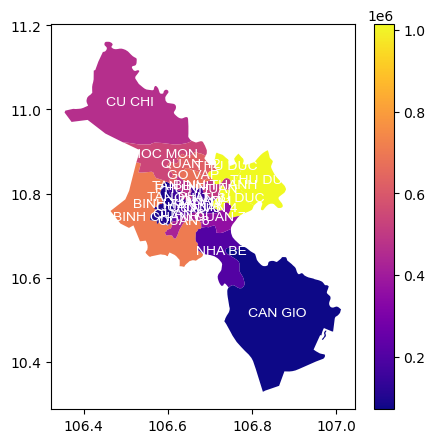

In [592]:
gdf['coords'] = gdf['geometry'].apply(lambda x: x.centroid.coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]


gdf.head(3)
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
f = gdf[gdf['region'].isin(["HO CHI MINH"])]
f.plot(column="population", legend=True, cmap='plasma', ax=ax)


for idx, row in f.iterrows():
    ax.annotate(text=row['dist'], xy=row['coords'],
                 horizontalalignment='center', fontname="arial", fontsize=10, color="white")
type(f)

In [593]:
# Function to calculate new point based on angle and distance


gdf['coords'] = gdf['geometry'].apply(lambda x: x.centroid.coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]


In [594]:
def calculate_angle(origin, target):
    dx = target[0] - origin[0]
    dy = target[1] - origin[1]
    angle = np.degrees(np.arctan2(dy, dx))
    return angle

def calculate_new_point(origin, angle, distance):
    angle_rad = np.radians(angle)
    x_new = origin[0] + distance * np.cos(angle_rad)
    y_new = origin[1] + distance * np.sin(angle_rad)
    return (x_new, y_new)

#def adjust_angles(angles, min_diff=2):
#    adjusted_angles = sorted(angles.copy())
#    for i, angle in enumerate(adjusted_angles):
#        if angle[i] - angle[i-1] < -min_diff or angle[i] - angle[i-1] > min_diff:
            

#    return adjusted_angles

f = gdf[gdf['region'].isin(["HA NOI"])].copy()
f_union = f.geometry.union_all()
f_center = f_union.centroid.coords[0]
f['angle'] = [calculate_angle(f_center, coords) for coords in f['coords']]
print(f['angle'].head())

#angles = f['angle'].tolist()
#adjusted_angles = adjust_angles(angles)
#f['angle'] = adjusted_angles

print(f['angle'].head())

227     17.241322
228    156.246617
229     17.930478
230   -107.817787
231    102.589544
Name: angle, dtype: float64
227     17.241322
228    156.246617
229     17.930478
230   -107.817787
231    102.589544
Name: angle, dtype: float64


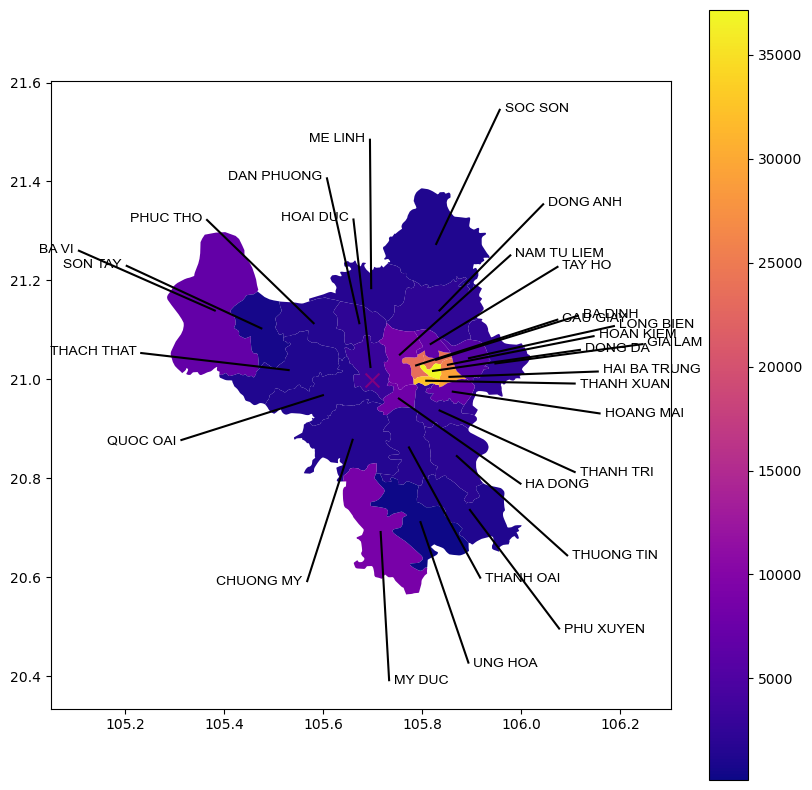

In [595]:
from shapely.geometry import Point



fig, ax = plt.subplots(1, 1, figsize=[10, 10])
f.plot(column="density", legend=True, cmap='plasma', ax=ax)
distance = 0.3  # Distance from the point to the external annotation
buff = 0.01

for idx, row in f.iterrows():
    coords = row['coords']
    region_name = row['region'] # Assuming region names match the keys in angles
    angle = row['angle']
    external_point = calculate_new_point(coords, angle, distance)
    ex_x, ex_y = external_point
    b_x, b_y = external_point[:]
    
    text = row['dist']
    
    if f_union.contains(Point(ex_x, ex_y)):
        line_color = 'green'
        text_color = 'green'
    else:
        line_color = 'black'
        text_color = 'black'
    
    if b_x > f_center[0]:  # Right of f_center
        horizontalalignment = 'left'
        b_x += buff # Move right
    else:  # Left of f_center
        horizontalalignment = 'right'
        b_x -= buff  # Move left
    
    if b_y < f_center[1]:  # Below f_center
        verticalalignment = 'top'
        b_y += buff  # Move down
    else:  # Above f_center
        verticalalignment = 'bottom'
        b_y -= buff  # Move up
    
    # Draw the line from the centroid to the external point
    ax.plot([coords[0], ex_x], [coords[1], ex_y], color=line_color)
    
   
    ax.annotate(text=text, xy=tuple([b_x, b_y]), horizontalalignment=horizontalalignment, verticalalignment=verticalalignment, fontname="Arial", fontsize=10, color=text_color)

ax.scatter(f_center[0], f_center[1], color='purple', marker='x', s=100)
# Show the plot
plt.show()

# Check the type of 'f'
#f.head()


In [596]:
buff = 0.1
t = (0.2, 0.2)
t = tuple(x+buff for x in t)

print(tuple(x+buff for x in external_point))

(105.99370118194781, 20.527473923383415)


gdf['coords'] = gdf['geometry'].apply(lambda x: x.centroid.coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]


gdf.head(3)
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
f = gdf[gdf['region'].isin(["HO CHI MINH"])]
f.plot(column="population", legend=True, cmap='plasma', ax=ax)


for idx, row in f.iterrows():
    ax.annotate(text=row['dist'], xy=row['coords'],
                 horizontalalignment='center', fontname="arial", fontsize=10, color="white")
type(f)